In [1]:
import matplotlib.pyplot as plt # For plotting
import numpy as np              # Linear algebra library
import pandas as pd

In [2]:
! pwd
expr_df = pd.read_csv("../metadata/length_and_depth.csv")
expr_df = expr_df.drop("nvar", axis=1)
expr_df = expr_df.rename(columns={
    "length" : "expr_length",
    "depth" : "expr_depth"
})
expr_df

/Users/felixgao/Desktop/Year3/STA378/OptimizationParameterTuning/Julia Notebook/src


,problem,objtype,variable_nvar,expr_length,expr_depth
0,NZF1,least_squares,True,250,8
1,arglina,least_squares,True,10404,9
2,arglinb,least_squares,True,40200,8
3,arglinc,other,True,39204,7
4,argtrig,other,True,497,7
...,...,...,...,...,...
100,tridia,other,True,398,6
101,vardim,other,True,798,6
102,vibrbeam,least_squares,False,481,13
103,watson,least_squares,False,3900,12


In [3]:
complete_df = pd.read_csv("../results/complete_dataset_as_of_nov6.csv")
complete_df = complete_df[complete_df["is_init_run"] == 0]
complete_df = complete_df.rename(columns={"name" : "problem"})
df = complete_df.merge(
    expr_df,
    on = 'problem',
    how = "inner"
)
df

,status,problem,solver,mem,nvar,time,memory,num_iter,nvmops,neval_obj,...,neval_grad,init_eval_grad_time,init_eval_grad_mem,init_eval_grad_alloc,is_init_run,is_scalable,objtype,variable_nvar,expr_length,expr_depth
0,first_order,NZF1,LBFGSSolver,1,91,1.409402,0.125416,287,287,328,...,315,0.000031,0.001440,5,False,False,least_squares,True,250,8
1,first_order,NZF1,LBFGSSolver,2,91,1.407668,0.095296,199,199,223,...,216,0.000019,0.001440,5,False,False,least_squares,True,250,8
2,first_order,NZF1,LBFGSSolver,3,91,1.407882,0.103456,213,213,234,...,228,0.000016,0.001440,5,False,False,least_squares,True,250,8
3,first_order,NZF1,LBFGSSolver,4,91,1.407476,0.098352,191,191,209,...,203,0.000017,0.001440,5,False,False,least_squares,True,250,8
4,first_order,NZF1,LBFGSSolver,5,91,1.407906,0.108416,209,209,231,...,225,0.000017,0.001440,5,False,False,least_squares,True,250,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18821,first_order,woods,LBFGSSolver,96,1000,1.482090,3.197624,64,64,84,...,75,0.001356,0.008664,5,False,True,other,True,425,7
18822,first_order,woods,LBFGSSolver,97,1000,1.481800,3.229800,64,64,84,...,75,0.001373,0.008664,5,False,True,other,True,425,7
18823,first_order,woods,LBFGSSolver,98,1000,1.482000,3.261976,64,64,84,...,75,0.001367,0.008664,5,False,True,other,True,425,7
18824,first_order,woods,LBFGSSolver,99,1000,1.481908,3.294152,64,64,84,...,75,0.001358,0.008664,5,False,True,other,True,425,7


In [4]:
group_cols = ["problem", "nvar"]

d = df[df["time"].notna()].copy()
d = d.sort_values(group_cols + ["time", "mem"], ascending=True)

best_idx = d.groupby(group_cols)["time"].idxmin()
best_mem_df = d.loc[best_idx].reset_index(drop=True)
best_mem_df

,status,problem,solver,mem,nvar,time,memory,num_iter,nvmops,neval_obj,...,neval_grad,init_eval_grad_time,init_eval_grad_mem,init_eval_grad_alloc,is_init_run,is_scalable,objtype,variable_nvar,expr_length,expr_depth
0,first_order,NZF1,LBFGSSolver,64,91,1.405412,0.241360,59,59,70,...,64,0.000017,0.001440,5,False,False,least_squares,True,250,8
1,first_order,NZF1,LBFGSSolver,72,988,3.127719,2.406504,81,81,94,...,86,0.001715,0.008600,5,False,True,least_squares,True,250,8
2,first_order,arglina,LBFGSSolver,4,100,0.004524,0.029440,1,1,3,...,3,0.000059,0.001520,5,False,False,least_squares,True,10404,9
3,first_order,arglina,LBFGSSolver,5,1000,1.400665,0.240920,1,1,3,...,3,0.005946,0.008664,5,False,True,least_squares,True,10404,9
4,first_order,arglinb,LBFGSSolver,1,100,1.422291,0.020488,2,2,29,...,5,0.000051,0.001520,5,False,False,least_squares,True,40200,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,first_order,vardim,LBFGSSolver,21,1000,28.733923,1.509576,1165,1165,6897,...,6873,0.004314,0.008664,5,False,True,other,True,798,6
180,first_order,vibrbeam,LBFGSSolver,11,8,0.578265,0.054456,103,103,179,...,126,0.000006,0.000720,5,False,False,least_squares,False,481,13
181,unbounded,watson,LBFGSSolver,51,31,1.019050,32.288992,1,1,8,...,8,0.001956,4.349024,42554,False,False,least_squares,False,3900,12
182,first_order,woods,LBFGSSolver,8,100,1.288446,0.060864,45,45,69,...,60,0.000016,0.001520,5,False,False,other,True,425,7


In [5]:
best_mem_map = d.loc[best_idx].set_index(group_cols)["mem"]

df = df.copy()
df["best_problem_mem"] = df.set_index(group_cols).index.map(best_mem_map)
df

,status,problem,solver,mem,nvar,time,memory,num_iter,nvmops,neval_obj,...,init_eval_grad_time,init_eval_grad_mem,init_eval_grad_alloc,is_init_run,is_scalable,objtype,variable_nvar,expr_length,expr_depth,best_problem_mem
0,first_order,NZF1,LBFGSSolver,1,91,1.409402,0.125416,287,287,328,...,0.000031,0.001440,5,False,False,least_squares,True,250,8,64
1,first_order,NZF1,LBFGSSolver,2,91,1.407668,0.095296,199,199,223,...,0.000019,0.001440,5,False,False,least_squares,True,250,8,64
2,first_order,NZF1,LBFGSSolver,3,91,1.407882,0.103456,213,213,234,...,0.000016,0.001440,5,False,False,least_squares,True,250,8,64
3,first_order,NZF1,LBFGSSolver,4,91,1.407476,0.098352,191,191,209,...,0.000017,0.001440,5,False,False,least_squares,True,250,8,64
4,first_order,NZF1,LBFGSSolver,5,91,1.407906,0.108416,209,209,231,...,0.000017,0.001440,5,False,False,least_squares,True,250,8,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18821,first_order,woods,LBFGSSolver,96,1000,1.482090,3.197624,64,64,84,...,0.001356,0.008664,5,False,True,other,True,425,7,8
18822,first_order,woods,LBFGSSolver,97,1000,1.481800,3.229800,64,64,84,...,0.001373,0.008664,5,False,True,other,True,425,7,8
18823,first_order,woods,LBFGSSolver,98,1000,1.482000,3.261976,64,64,84,...,0.001367,0.008664,5,False,True,other,True,425,7,8
18824,first_order,woods,LBFGSSolver,99,1000,1.481908,3.294152,64,64,84,...,0.001358,0.008664,5,False,True,other,True,425,7,8


In [6]:
# unique instances: one row per (problem, nvar)
instances = df[["problem", "nvar"]].drop_duplicates()

# shuffle instances
instances = instances.sample(frac=1, random_state=42).reset_index(drop=True)

n = len(instances)
n_train = int(0.7 * n)
n_valid = int(0.15 * n)

train_inst = instances.iloc[:n_train]
valid_inst = instances.iloc[n_train:n_train + n_valid]
test_inst  = instances.iloc[n_train + n_valid:]

# assign rows to splits by (problem, nvar)
train_df = df.merge(train_inst, on=["problem", "nvar"], how="inner").reset_index(drop=True)
valid_df = df.merge(valid_inst, on=["problem", "nvar"], how="inner").reset_index(drop=True)
test_df  = df.merge(test_inst,  on=["problem", "nvar"], how="inner").reset_index(drop=True)
train_df

,status,problem,solver,mem,nvar,time,memory,num_iter,nvmops,neval_obj,...,init_eval_grad_time,init_eval_grad_mem,init_eval_grad_alloc,is_init_run,is_scalable,objtype,variable_nvar,expr_length,expr_depth,best_problem_mem
0,first_order,NZF1,LBFGSSolver,1,91,1.409402,0.125416,287,287,328,...,0.000031,0.001440,5,False,False,least_squares,True,250,8,64
1,first_order,NZF1,LBFGSSolver,2,91,1.407668,0.095296,199,199,223,...,0.000019,0.001440,5,False,False,least_squares,True,250,8,64
2,first_order,NZF1,LBFGSSolver,3,91,1.407882,0.103456,213,213,234,...,0.000016,0.001440,5,False,False,least_squares,True,250,8,64
3,first_order,NZF1,LBFGSSolver,4,91,1.407476,0.098352,191,191,209,...,0.000017,0.001440,5,False,False,least_squares,True,250,8,64
4,first_order,NZF1,LBFGSSolver,5,91,1.407906,0.108416,209,209,231,...,0.000017,0.001440,5,False,False,least_squares,True,250,8,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13021,first_order,vardim,LBFGSSolver,96,1000,29.012861,3.926536,1165,1165,6897,...,0.004181,0.008664,5,False,True,other,True,798,6,21
13022,first_order,vardim,LBFGSSolver,97,1000,28.999431,3.958712,1165,1165,6897,...,0.004192,0.008664,5,False,True,other,True,798,6,21
13023,first_order,vardim,LBFGSSolver,98,1000,28.868402,3.990888,1165,1165,6897,...,0.004235,0.008664,5,False,True,other,True,798,6,21
13024,first_order,vardim,LBFGSSolver,99,1000,28.898239,4.023064,1165,1165,6897,...,0.004209,0.008664,5,False,True,other,True,798,6,21


In [7]:
instances

,problem,nvar
0,cragglvy2,100
1,enso,9
2,integreq,1000
3,bdqrtic,1000
4,fletcbv2,1000
...,...,...
179,arglina,1000
180,clplatea,100
181,sinquad,100
182,tointgss,1000


In [8]:
from sklearn.ensemble import RandomForestRegressor
feature_cols = ["nvar", 
                "expr_length", 
                "expr_depth", 
                "init_eval_obj_time", 
                "init_eval_grad_time",
                "mem",
                ]
target_col = "time"

X_train = train_df[feature_cols].to_numpy(dtype=float)
X_valid = valid_df[feature_cols].to_numpy(dtype=float)
X_test  = test_df[feature_cols].to_numpy(dtype=float)
t_test_full  = np.log1p(test_df[target_col].to_numpy(dtype=float))

t_train = np.log1p(train_df[target_col].to_numpy(dtype=float))
t_valid = np.log1p(valid_df[target_col].to_numpy(dtype=float))
t_test  = np.log1p(test_df[target_col].to_numpy(dtype=float))

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

best_rf = None
best_score = np.inf
best_params = None

random_state = 66

for n_estimators in range(100, 200, 10):
    for max_depth in [3, 5, 7, 9]:
        for min_leaf in [1, 2, 5]:
            rf = RandomForestRegressor(
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_leaf=min_leaf,
                random_state=66,
                n_jobs=-1,
            )
            rf.fit(X_train, t_train)

            pred_valid = rf.predict(X_valid)
            mse_valid = mean_squared_error(t_valid, pred_valid)

            if mse_valid < best_score:
                best_score = mse_valid
                best_rf = rf
                best_params = (n_estimators, max_depth, min_leaf)
                print(
                        "New best:",
                        "n =", n_estimators,
                        "depth =", max_depth,
                        "min_leaf =", min_leaf,
                        "mse =", mse_valid,
                    )
            else:
                print(
                        "n =", n_estimators,
                        "depth =", max_depth,
                        "min_leaf =", min_leaf,
                        "mse =", mse_valid,
                    )

print("Best validation MSE (forest):", best_score)
print("Best params (n_estimators, max_depth, min_leaf):", best_params)


New best: n = 100 depth = 3 min_leaf = 1 mse = 1.5058664798299481
n = 100 depth = 3 min_leaf = 2 mse = 1.5058664798299481
n = 100 depth = 3 min_leaf = 5 mse = 1.5058664798299481
New best: n = 100 depth = 5 min_leaf = 1 mse = 1.483611272694133
New best: n = 100 depth = 5 min_leaf = 2 mse = 1.483503721935945
New best: n = 100 depth = 5 min_leaf = 5 mse = 1.4815002035118878
New best: n = 100 depth = 7 min_leaf = 1 mse = 1.261453601483848
n = 100 depth = 7 min_leaf = 2 mse = 1.2676980644610294
n = 100 depth = 7 min_leaf = 5 mse = 1.2729958335822213
n = 100 depth = 9 min_leaf = 1 mse = 1.419032259229767
n = 100 depth = 9 min_leaf = 2 mse = 1.3021664658534864
n = 100 depth = 9 min_leaf = 5 mse = 1.2809326083204624
n = 110 depth = 3 min_leaf = 1 mse = 1.5062970410007133
n = 110 depth = 3 min_leaf = 2 mse = 1.5062970410007133
n = 110 depth = 3 min_leaf = 5 mse = 1.5062970410007133
n = 110 depth = 5 min_leaf = 1 mse = 1.4840227494134657
n = 110 depth = 5 min_leaf = 2 mse = 1.4838981523571682
n 

In [10]:
import statsmodels.api as sm
best_n, best_depth, best_min_leaf = best_params

X_train_full = np.vstack([X_train, X_valid])
t_train_full = np.concatenate([t_train, t_valid])
y_train_full = np.log1p(t_train_full)

final_rf = RandomForestRegressor(
    n_estimators=best_n,
    max_depth=best_depth,
    min_samples_leaf=best_min_leaf,
    random_state=0,
    n_jobs=-1,
)
final_rf.fit(X_train_full, y_train_full)

# predict on test in log1p space
pred_test_log = final_rf.predict(X_test)

# convert back to time
pred_test_time = np.expm1(pred_test_log)

test_mse = mean_squared_error(t_test, pred_test_time)
test_mae = mean_absolute_error(t_test, pred_test_time)
test_r2  = r2_score(t_test, pred_test_time)

print("Test MSE (time):", test_mse)
print("Test MAE (time):", test_mae)
print("Test R^2 (time):", test_r2)


Test MSE (time): 2.640034976910462
Test MAE (time): 0.8499505684945962
Test R^2 (time): -1.9224052610438473


In [11]:
feature_cols = [c for c in feature_cols if c != "mem"]
X_test  = test_df[feature_cols].to_numpy(dtype=float)

def choose_best_mem(model, x_problem, mem_candidates):
    preds = []
    for mem in mem_candidates:
        x = np.concatenate([x_problem, [mem]])
        preds.append((mem, model.predict(x.reshape(1, -1))[0]))
    return min(preds, key=lambda x: x[1])


In [12]:
best_n_estimators, best_max_depth, best_min_leaf = best_params

X_train_full = np.vstack([X_train, X_valid])
t_train_full = np.concatenate([t_train, t_valid])

final_rf = RandomForestRegressor(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    min_samples_leaf=best_min_leaf,
    random_state=0,
    n_jobs=-1,
)
X_train_full

array([[9.100000e+01, 2.500000e+02, 8.000000e+00, 1.375600e-05,
        3.141000e-05, 1.000000e+00],
       [9.100000e+01, 2.500000e+02, 8.000000e+00, 1.964000e-06,
        1.938700e-05, 2.000000e+00],
       [9.100000e+01, 2.500000e+02, 8.000000e+00, 1.553000e-06,
        1.647200e-05, 3.000000e+00],
       ...,
       [1.000000e+03, 2.000000e+02, 8.000000e+00, 1.533000e-06,
        1.095124e-03, 9.800000e+01],
       [1.000000e+03, 2.000000e+02, 8.000000e+00, 1.713000e-06,
        1.080827e-03, 9.900000e+01],
       [1.000000e+03, 2.000000e+02, 8.000000e+00, 1.553000e-06,
        1.090616e-03, 1.000000e+02]], shape=(15826, 6))

In [13]:
final_rf.fit(X_train_full, t_train_full)

,n_estimators,100
,criterion,'squared_error'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
group_cols = ["problem", "nvar"]
problem_feature_cols = [c for c in feature_cols if c != "mem"]
X_test = (
    test_df.sort_values(group_cols)
           .drop_duplicates(subset=group_cols, keep="first")[problem_feature_cols]
           .reset_index(drop=True)
)
X_test


,nvar,expr_length,expr_depth,init_eval_obj_time,init_eval_grad_time
0,100,10404,9,0.000005,0.000054
1,1000,10404,9,0.000046,0.006069
2,1000,642,7,0.000019,0.002472
3,100,956,6,0.000004,0.000055
4,1000,297,6,0.000007,0.002476
5,100,3335,8,0.000005,0.000057
6,100,3335,8,0.000004,0.000056
7,999,887,6,0.000073,0.012059
8,999,887,6,0.000074,0.011915
9,100,392,5,0.000002,0.000031


In [15]:
group_cols = ["problem", "nvar"]
problem_cols = ["problem", "nvar", "mem", "best_problem_mem", "time"]

problems = (
    test_df.loc[test_df["mem"] == test_df["best_problem_mem"], problem_cols]
           .drop_duplicates(subset=group_cols, keep="first")
           .reset_index(drop=True)
           .rename(columns={"time": "best_time"})
)
problems

,problem,nvar,mem,best_problem_mem,best_time
0,arglina,100,4,4,0.004524
1,clplatea,100,48,48,1.396622
2,curly,100,96,96,1.417469
3,curly10,100,98,98,1.435234
4,dqdrtic,100,8,8,1.239286
5,fminsrf2,100,69,69,1.464990
6,gauss3,8,49,49,0.684025
7,indef_mod,100,38,38,1.292279
8,integreq,100,26,26,1.307481
9,nondquar,100,94,94,1.335757


In [16]:
mem_candidates = np.arange(1, 101)
preds = []

for i, x_problem in enumerate(X_test.itertuples(index=False, name=None)):
    pred = choose_best_mem(final_rf, x_problem, mem_candidates)
    preds.append(pred)

    prob_name = problems.iloc[i]["problem"]
    nvar = problems.iloc[i]["nvar"]
    actual_best_mem = problems.iloc[i]["best_problem_mem"]

    print(
        f"Best predicted mem for {prob_name}({nvar}) is mem={pred[0]} "
        f"and the actual best mem is {actual_best_mem} with runtime={pred[1]}"
    )
preds

Best predicted mem for arglina(100) is mem=3 and the actual best mem is 4 with runtime=0.8608704978385595
Best predicted mem for clplatea(100) is mem=89 and the actual best mem is 48 with runtime=4.123357578735163
Best predicted mem for curly(100) is mem=8 and the actual best mem is 96 with runtime=0.9018728042884999
Best predicted mem for curly10(100) is mem=8 and the actual best mem is 98 with runtime=0.8562811192510579
Best predicted mem for dqdrtic(100) is mem=55 and the actual best mem is 8 with runtime=1.02606727270027
Best predicted mem for fminsrf2(100) is mem=3 and the actual best mem is 69 with runtime=0.8566872894895375
Best predicted mem for gauss3(8) is mem=76 and the actual best mem is 49 with runtime=0.8566872894895374
Best predicted mem for indef_mod(100) is mem=1 and the actual best mem is 38 with runtime=1.3307311434228652
Best predicted mem for integreq(100) is mem=1 and the actual best mem is 26 with runtime=1.3307311434228652
Best predicted mem for nondquar(100) is

[(np.int64(3), np.float64(0.8608704978385595)),
 (np.int64(89), np.float64(4.123357578735163)),
 (np.int64(8), np.float64(0.9018728042884999)),
 (np.int64(8), np.float64(0.8562811192510579)),
 (np.int64(55), np.float64(1.02606727270027)),
 (np.int64(3), np.float64(0.8566872894895375)),
 (np.int64(76), np.float64(0.8566872894895374)),
 (np.int64(1), np.float64(1.3307311434228652)),
 (np.int64(1), np.float64(1.3307311434228652)),
 (np.int64(1), np.float64(0.8312648133409098)),
 (np.int64(41), np.float64(5.711524125437824)),
 (np.int64(49), np.float64(0.8542856209129631)),
 (np.int64(13), np.float64(0.9127381913098757)),
 (np.int64(4), np.float64(0.474828044630419)),
 (np.int64(3), np.float64(0.8561607540295293)),
 (np.int64(56), np.float64(4.587190580047939)),
 (np.int64(1), np.float64(0.9327165929494241)),
 (np.int64(1), np.float64(0.831767604602176)),
 (np.int64(36), np.float64(0.4571160128700242)),
 (np.int64(1), np.float64(0.8083928338881311)),
 (np.int64(1), np.float64(0.80821678311

In [20]:
feature_cols = ["nvar", 
                "expr_length", 
                "expr_depth", 
                "init_eval_obj_time", 
                "init_eval_grad_time",
                "mem",
                ]
feature_cols

['nvar',
 'expr_length',
 'expr_depth',
 'init_eval_obj_time',
 'init_eval_grad_time',
 'mem']

In [23]:
X_test_full = test_df[feature_cols].to_numpy(dtype=float)
y_pred_test = final_rf.predict(X_test_full)

test_mse = mean_squared_error(t_test, y_pred_test)
test_mae = mean_absolute_error(t_test, y_pred_test)
test_r2  = r2_score(t_test, y_pred_test)

print("Random forest test MSE:", test_mse)
print("Random forest test MAE:", test_mae)
print("Random forest test R^2:", test_r2)



Random forest test MSE: 2.566184271692642
Random forest test MAE: 0.8367323010185433
Random forest test R^2: -1.8406557041827019


In [24]:
preds
actual_best_mem = problems["best_problem_mem"]
actual_best_mem

0      4
1     48
2     96
3     98
4      8
5     69
6     49
7     38
8     26
9     94
10    68
11     1
12     1
13    50
14     5
15    11
16    51
17     5
18     9
19     1
20    39
21    34
22     3
23    11
24     5
25    40
26    98
27    72
28     8
Name: best_problem_mem, dtype: int64

In [25]:
predicted_mem = np.array([pred[0] for pred in preds], dtype=int)
actual_best_mem = np.array(actual_best_mem, dtype=int)
acc = np.mean(predicted_mem == actual_best_mem)
print(f"Mem exact match accuracy: {acc:.2f}")

Mem exact match accuracy: 0.03


In [26]:
predicted_time = np.array([pred[1] for pred in preds], dtype=float)
best_time = problems["best_time"]
ratios = predicted_time / best_time
within_5  = np.mean(ratios <= 1.05)
within_10 = np.mean(ratios <= 1.10)
print(f"Median time ratio: {np.median(ratios):.2f}")
print(f"Within 5% of optimal: {within_5:.2f}")
print(f"Within 10% of optimal: {within_10:.2f}")

Median time ratio: 0.68
Within 5% of optimal: 0.72
Within 10% of optimal: 0.76


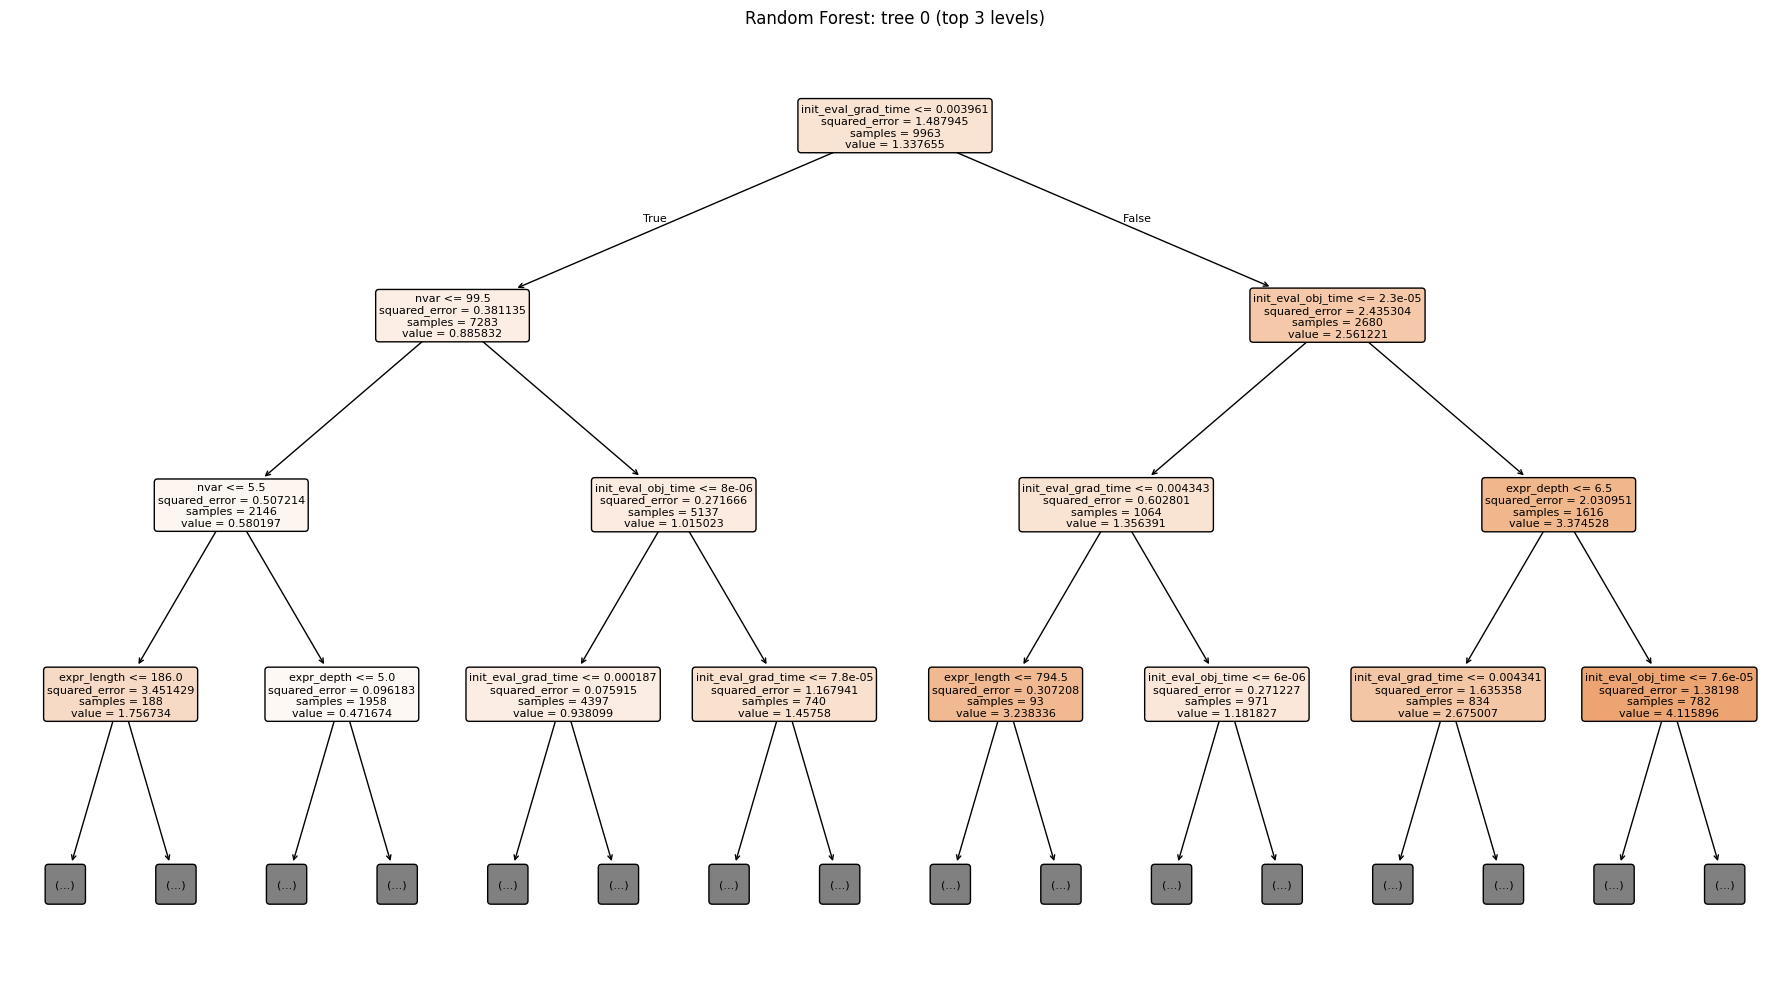

In [27]:
rf_tree0 = final_rf.estimators_[0]
from sklearn import tree

plt.figure(figsize=(18, 10))
tree.plot_tree(
    rf_tree0,
    feature_names=feature_cols,
    filled=True,
    rounded=True,
    max_depth=3,
    fontsize=8,
    precision=6,
)
plt.title("Random Forest: tree 0 (top 3 levels)")
plt.tight_layout()
plt.show()

In [28]:
from sklearn.tree import export_graphviz
import os

dot_data = export_graphviz(
    rf_tree0,
    max_depth=6,
    out_file=None,               # return string instead of writing directly to file
    feature_names=feature_cols,
    filled=True,
    rounded=True,
    precision=6                  # <-- more decimal places
)


PDF written to: ../tree_plots/random_forest.pdf


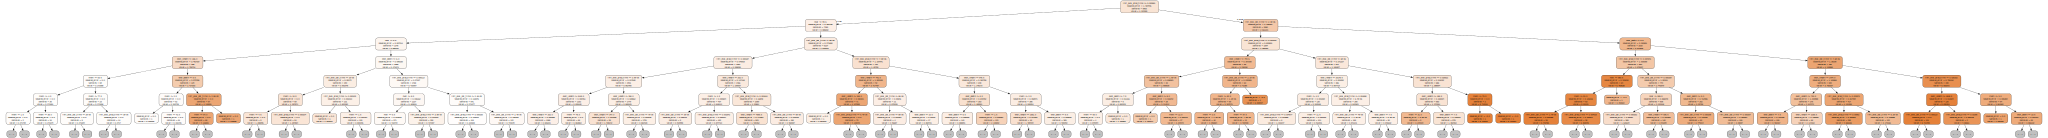

In [29]:
from graphviz import Source

os.makedirs("../tree_plots", exist_ok=True)

tree_graph = Source(dot_data)
pdf_path = tree_graph.render(
    filename="random_forest",    # base name
    directory="../tree_plots",
    format="pdf",
    cleanup=True                     # delete intermediate .dot
)
print("PDF written to:", pdf_path)
tree_graph

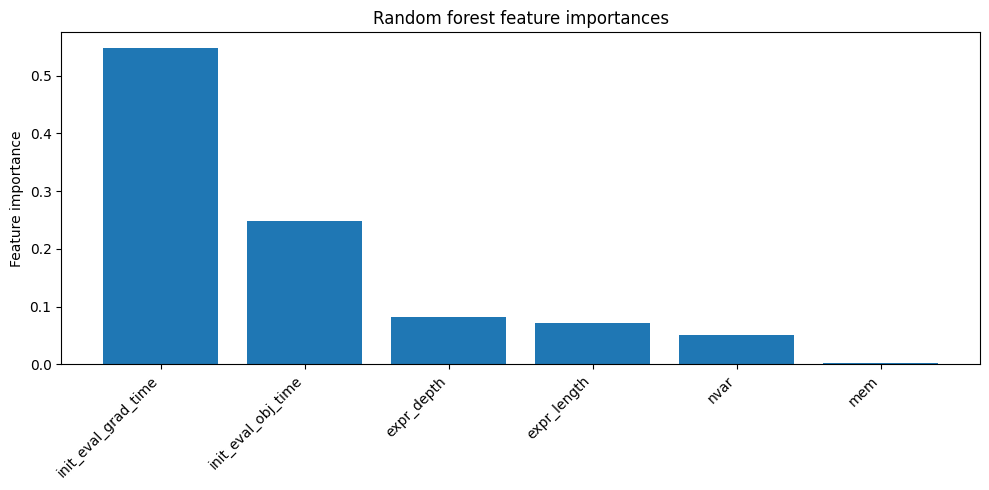

In [30]:
import numpy as np
import matplotlib.pyplot as plt

rf_importances = final_rf.feature_importances_
indices_rf = np.argsort(rf_importances)[::-1]  

plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_cols)), rf_importances[indices_rf])
plt.xticks(range(len(feature_cols)), [feature_cols[i] for i in indices_rf], rotation=45, ha="right")
plt.ylabel("Feature importance")
plt.title("Random forest feature importances")
plt.tight_layout()
plt.show()
